In [1]:
import statsmodels.tools.eval_measures as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("./data/dc_bikes_full.csv", parse_dates=['datetime'], index_col=0)

In [3]:
df.set_index('datetime', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,part_of_day,weekday
datetime,,,,,,,,,,,,,,,,,,
01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,0,0,night,Sa
01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,0,night,Sa
01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,2,0,night,Sa
01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,3,0,night,Sa
01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,4,0,night,Sa


### Calculating the number of counts per day in 2011 and 2012 
to see what time customers rent bikes most


Text(0.5, 1.0, 'Count Data for 01-05-2012')

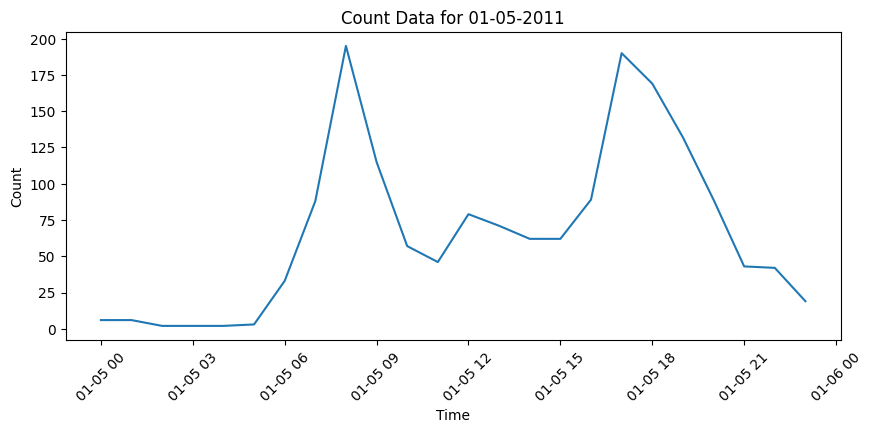

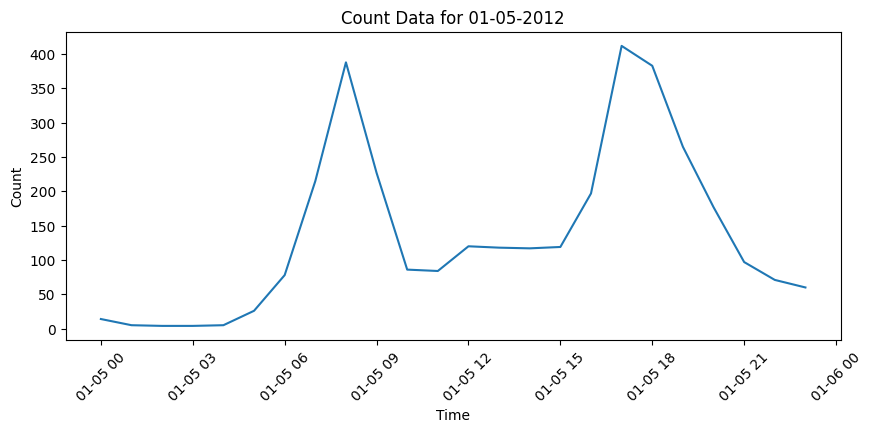

In [4]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.set_index('datetime', inplace=True)

one_day_section_2011 = df.loc['01-05-2011', 'count']
plt.figure(figsize=(10, 4))
plt.plot(one_day_section_2011)
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count Data for 01-05-2011')

one_day_section_2012 = df.loc['01-05-2012', 'count']
plt.figure(figsize=(10, 4))
plt.plot(one_day_section_2012)
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count Data for 01-05-2012')


### Checking how the season affects the number of rented bikes

In [5]:
average_counts_per_season = df.groupby(['season', 'year'])['count'].mean()
average_counts_per_season_df = average_counts_per_season.reset_index()
average_counts_per_season_df

,season,year,count
0,1,2011,80.315764
1,1,2012,134.656394
2,2,2011,170.807535
3,2,2012,240.892112
4,3,2011,204.672321
5,3,2012,262.996897
6,4,2011,171.917994
7,4,2012,234.846044


In [6]:
pivot_table = average_counts_per_season_df.pivot(index='season', columns='year', values='count')

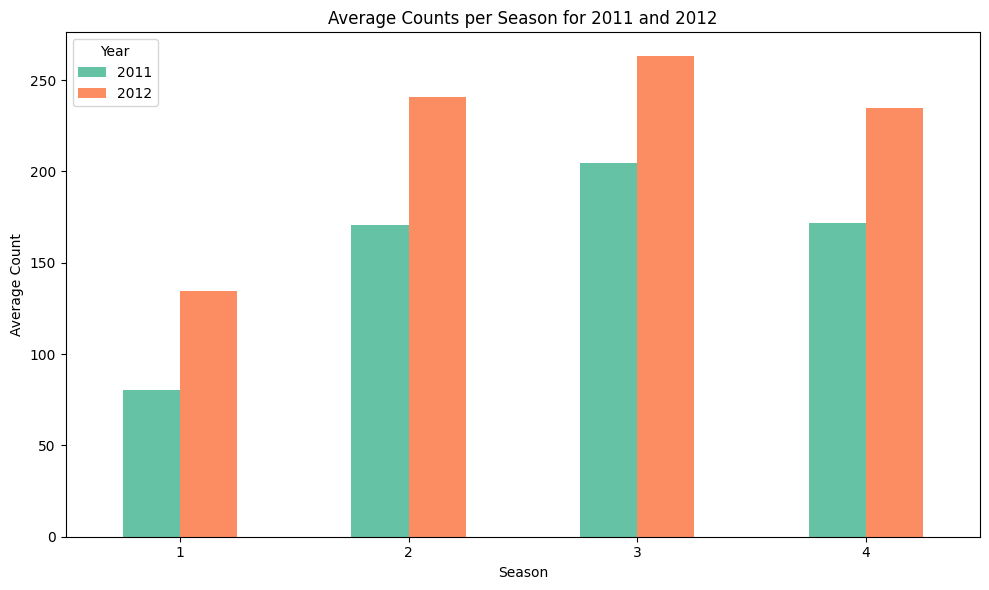

In [7]:
sns.set_palette('Set2')
ax = pivot_table.plot(kind='bar', figsize=(10, 6),width=0.5)

ax.legend(title='Year', loc= 'upper left')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.title('Average Counts per Season for 2011 and 2012')
plt.xticks(rotation=0)
plt.tight_layout()

### Visualizing how day of week and time affect bike rentals

In [8]:
pivot_table2 = pd.pivot_table(df, values='count', 
                             index='weekday', 
                             columns='hour', 
                             aggfunc='mean')
pivot_table2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fr,52.336538,24.548077,13.288462,7.509804,6.762887,24.451923,96.317308,265.586538,482.942308,262.192308,...,226.153846,244.807692,331.028846,506.307692,436.201923,310.990385,223.653846,174.432692,155.307692,118.990385
Mo,33.514286,17.942308,11.282828,6.422680,6.173469,20.692308,82.769231,238.144231,394.846154,210.576923,...,182.759615,192.355769,267.134615,478.951923,454.586538,328.153846,228.528846,163.576923,110.500000,63.384615
Sa,97.114286,68.752381,49.447619,23.295238,9.514286,11.815534,25.257143,51.552381,120.238095,189.438095,...,386.561905,392.152381,373.057143,345.600000,299.759615,246.163462,187.778846,160.509615,143.038462,119.105769
Su,94.971154,76.096154,58.617647,28.365385,10.617647,12.051020,19.640777,39.800000,87.676190,159.171429,...,369.219048,364.076190,371.447619,332.771429,276.161905,230.000000,176.123810,133.714286,102.780952,67.209524
Th,40.757282,18.077670,10.676471,6.775510,6.310000,26.155340,109.194175,310.213592,499.796117,243.631068,...,178.524272,196.834951,287.663462,533.086538,503.432692,364.750000,271.663462,201.788462,149.644231,101.269231
Tu,27.732673,13.130000,7.564356,5.184783,5.606061,22.653465,98.480392,274.647059,440.794118,222.892157,...,157.355769,175.201923,270.750000,517.759615,497.605769,337.346154,238.038462,174.730769,126.115385,74.730769
We,35.509615,16.375000,9.401961,6.040404,5.364583,24.105769,102.692308,287.836538,470.759615,233.269231,...,167.769231,180.846154,264.134615,504.144231,496.737864,358.893204,255.553398,194.097087,144.106796,82.941748


In [ ]:
#desired_order = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
#pivot_table2 = pivot_table2.loc[desired_order]
#pivot_table2 = pivot_table2.reindex(desired_order)
#pivot_table2

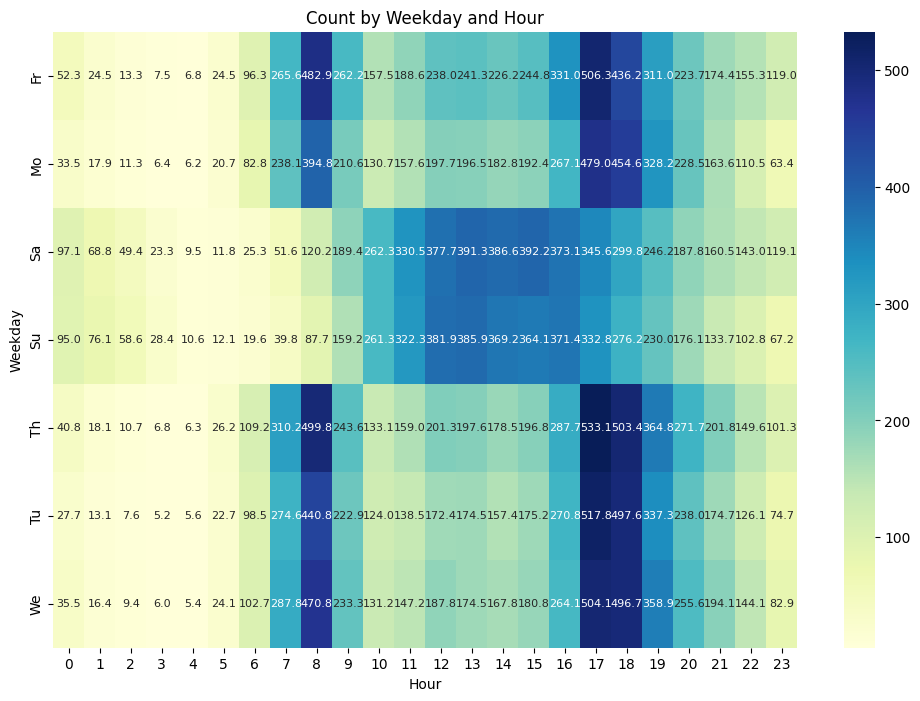

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table2, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True, annot_kws={"fontsize": 8})
plt.title('Count by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

### Looking for correlation between weather conditions and number of bikes rented

In [10]:
subset_df = df[['atemp', 'humidity', 'windspeed', 'count', 'temp']]

In [13]:
correlation_matrix = subset_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

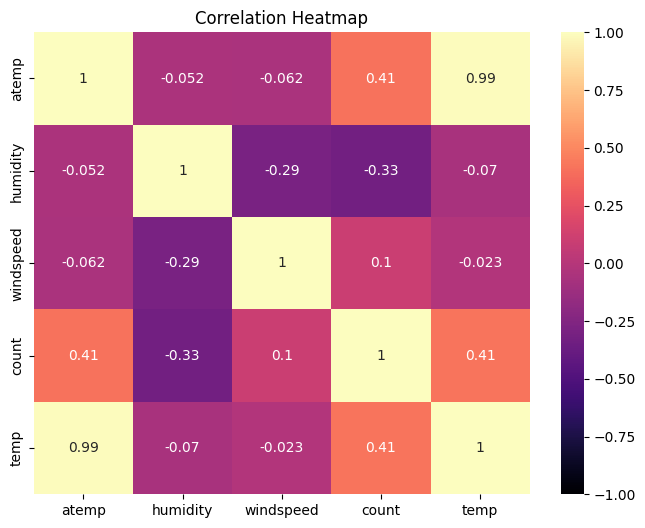

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

#### Highest correlation is observed with real and felt temperature. 
Since the difference btw real and felt tempereture is not significant, only felt temperarure is taken for further calculations

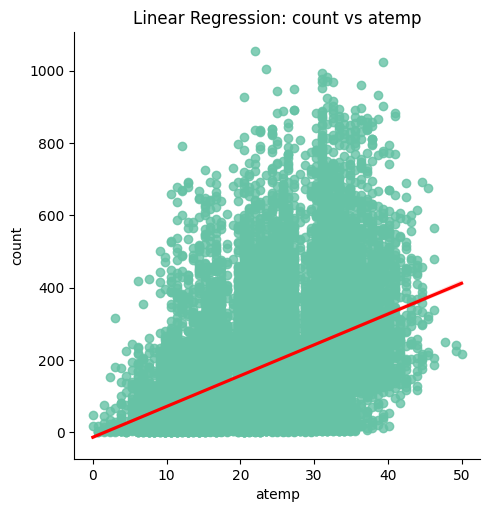

In [15]:
sns.lmplot(data=df, x='atemp', y='count', line_kws={'color': 'red'})
plt.title('Linear Regression: count vs atemp')
plt.xlabel('atemp')
plt.ylabel('count')
plt.show()

### Calculating R2

In [16]:
sm.rmse(subset_df['count'], subset_df['atemp'])

239.85254748720615

In [17]:
X = subset_df[['atemp']]
y = subset_df['count']

In [18]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [20]:
r2 = r2_score(y, y_pred)
r2.round(2)

0.17

###### Conclution: R2 is too low => forecast is not useful 

### Calculate R2 with additional features

In [21]:
subset_df

,atemp,humidity,windspeed,count,temp
datetime,,,,,
2011-01-01 00:00:00,14.395,81,0.0000,16,9.84
2011-01-01 01:00:00,13.635,80,0.0000,40,9.02
2011-01-01 02:00:00,13.635,80,0.0000,32,9.02
2011-01-01 03:00:00,14.395,75,0.0000,13,9.84
2011-01-01 04:00:00,14.395,75,0.0000,1,9.84
...,...,...,...,...,...
2012-12-31 19:00:00,12.880,60,11.0014,156,10.66
2012-12-31 20:00:00,12.880,60,11.0014,104,10.66
2012-12-31 21:00:00,12.880,60,11.0014,67,10.66


In [22]:
X = subset_df[['atemp', 'humidity','windspeed', 'temp']]

In [23]:
model.fit(X, y)
y_pred = model.predict(X)

In [25]:
r2 = r2_score(y, y_pred)
r2.round(2)

0.27

###### Conclution: R2 is still low. Weather conditions is not useful for prediction

In [ ]:
#X = subset2_df = df[['day', 'month', 'hour', 'year']]

In [ ]:
#model.fit(X, y)
#y_pred = model.predict(X)

In [ ]:
#r2 = r2_score(y, y_pred)
#r2

### Calculation confidence intervals for the mean of counts

In [26]:
from scipy import stats

In [27]:
mean = df['count'].mean()
std = df['count'].std()

In [28]:
confidence_level = 0.95

In [29]:
n = len(df['count'])

In [30]:
std_error = std / (n ** 0.5)

In [31]:
confidence_interval = stats.t.interval(confidence_level, df=n-1, loc=mean, scale=std_error)

In [32]:
confidence_interval

(185.9718214429567, 191.2535655183184)

### Analysis of registered and casual customers

In [34]:
customer_df = df[['casual', 'registered', 'year']]
customer_df.head()

,casual,registered,year
datetime,,,
2011-01-01 00:00:00,3.0,13.0,2011
2011-01-01 01:00:00,8.0,32.0,2011
2011-01-01 02:00:00,5.0,27.0,2011
2011-01-01 03:00:00,3.0,10.0,2011
2011-01-01 04:00:00,0.0,1.0,2011


In [35]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   casual      10886 non-null  float64
 1   registered  10886 non-null  float64
 2   year        17379 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 543.1 KB


In [36]:
customer_df.isna().sum()

casual        6493
registered    6493
year             0
dtype: int64

In [37]:
customer_df.dropna()

,casual,registered,year
datetime,,,
2011-01-01 00:00:00,3.0,13.0,2011
2011-01-01 01:00:00,8.0,32.0,2011
2011-01-01 02:00:00,5.0,27.0,2011
2011-01-01 03:00:00,3.0,10.0,2011
2011-01-01 04:00:00,0.0,1.0,2011
...,...,...,...
2012-12-19 19:00:00,7.0,329.0,2012
2012-12-19 20:00:00,10.0,231.0,2012
2012-12-19 21:00:00,4.0,164.0,2012


In [38]:
data_2011 = customer_df[customer_df['year'] == 2011]
data_2012 = customer_df[customer_df['year'] == 2012]

In [39]:
avg_registered_2011 = data_2011['registered'].mean()
avg_casual_2011 = data_2011['casual'].mean()

In [40]:
avg_registered_2012 = data_2012['registered'].mean()
avg_casual_2012 = data_2012['casual'].mean()

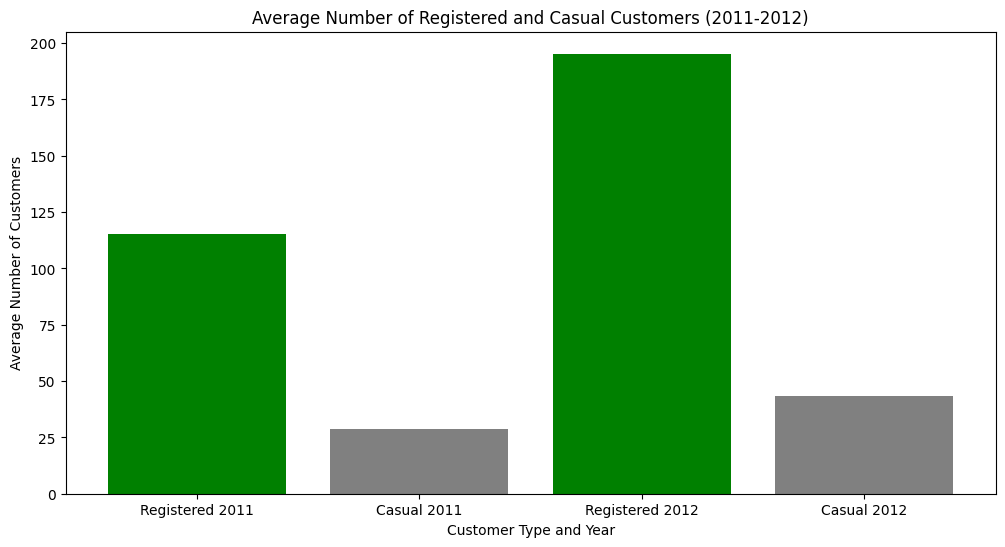

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(['Registered 2011',  'Casual 2011', 'Registered 2012', 'Casual 2012'], 
        [avg_registered_2011, avg_casual_2011, avg_registered_2012,  avg_casual_2012],
        color=['green', 'gray', 'green', 'gray'])
plt.xlabel('Customer Type and Year')
plt.ylabel('Average Number of Customers')
plt.title('Average Number of Registered and Casual Customers (2011-2012)')
plt.show()

In [43]:
percentage_change = (avg_registered_2012 / avg_registered_2011) * 100
percentage_change

169.12171935325836

In [ ]:
#avg_registered_2011

In [ ]:
#avg_casual_2011

In [ ]:
#avg_registered_2012

In [ ]:
#avg_casual_2012

### Calculating data for AB testing 
abtestguide.com

In [44]:
sum_registered_2012 = data_2012['registered'].sum()
sum_registered_2012

1067179.0

In [45]:
sum_casual_2012 = data_2012['casual'].sum()
sum_casual_2012

236318.0

In [46]:
predicted_redistered_2013 = sum_registered_2012 + (0.69 * sum_registered_2012)
predicted_redistered_2013.round()

1803533.0

In [47]:
predicted_casual_2013 = sum_casual_2012 + (0.69 * sum_casual_2012)
predicted_casual_2013.round()

399377.0

### Conclusion: 
1. The number of registered clients increased by 69% over the year. 
2. The most requested time for bikes is on weekdays between 7 and 9 am and 4 and 8 pm. On weekends, the demand for bicycles is also quite high, and occurs mainly between 10 am and 4pm. 
3. In addition, the season affects the number of bikes rented. Number of rented bikes is expected to decrease in winter, so the company should expect and be ready for a profit decrease in the 1st quarter.